## **Gradient Descent algorithm**
**Gradient Descent** is an iterative optimization algorithm that finds the minimum of a function.


*   **MSE** function is being used as the Cost Function("Loss Function")
*   Goal is to **minimize this error** value to obtain most accurate values for **m (slope)** and **b (y-intercept)**, so the distance between all points and the line is as small as possible.



In [12]:
# Import libraries
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate random sample data
x, y = make_regression(n_samples=200, n_features=1, noise=35, random_state=42)
x = np.reshape(x, x.shape[0])

# Build the Gradient Descent function
def linear_regression(x, y):
    m = 0 # Slope
    b = 0 # y-intercept
    # m, b = float(np.random.random(1)), float(np.random.random(1)) # Give random values to m & b instead of 0
    
    n = float(len(x)) # Sample size of training set
    
    alpha = 0.1 # Learning rate
    epochs = 1000 # Number of iterations
    
    prev_cost = 0 # Variable to be compared with cost value
    
    J = [] # Cost values
    
    # Perform Gradient Descent algorithm
    for i in range(epochs):
        y_pred = m*x + b # Current predicted value of y
        cost = (1/n) * sum([val**2 for val in (y - y_pred)]) # MSE function used as the Cost Function
        J.append(cost)
        Dm = (-2/n) * sum(x*(y - y_pred)) # Partial Derivative with respect of m 
        Db = (-2/n) * sum(y - y_pred) # Partial Derivative with respect of b
        m = m - alpha*Dm # Update current value of m
        b = b - alpha*Db # Update current value of b
        
        # Compare previous cost with current cost. Stop loop when costs are similar
        if math.isclose(cost, prev_cost, rel_tol=1e-20):
            print('Gradient Descent reached its minimum value!\
            \nIterations: {}   | Cost: {}'.format(i, round(cost,3)))
            break
        
        prev_cost = cost # Update previous cost value
        
        # print("Iteration: {} | m = {} | b = {} | error = {}".format(i, m, b, cost))
        
    return m, b, J

# Call the function
m, b, J = linear_regression(x=x, y=y)

# Print m & b optimal values and the Hypothesis
print('Slope (m):= {} | Y-intercept (b):= {}'.format(round(m,3), round(b,3)))
print('y = {}x + {}'.format(round(m,2), round(b,2)))

Gradient Descent reached its minimum value!            
Iterations: 102   | Cost: 1244.982
Slope (m):= 86.439 | Y-intercept (b):= 5.0
y = 86.44x + 5.0


## **Plotting the Linear Regression Best Fit**

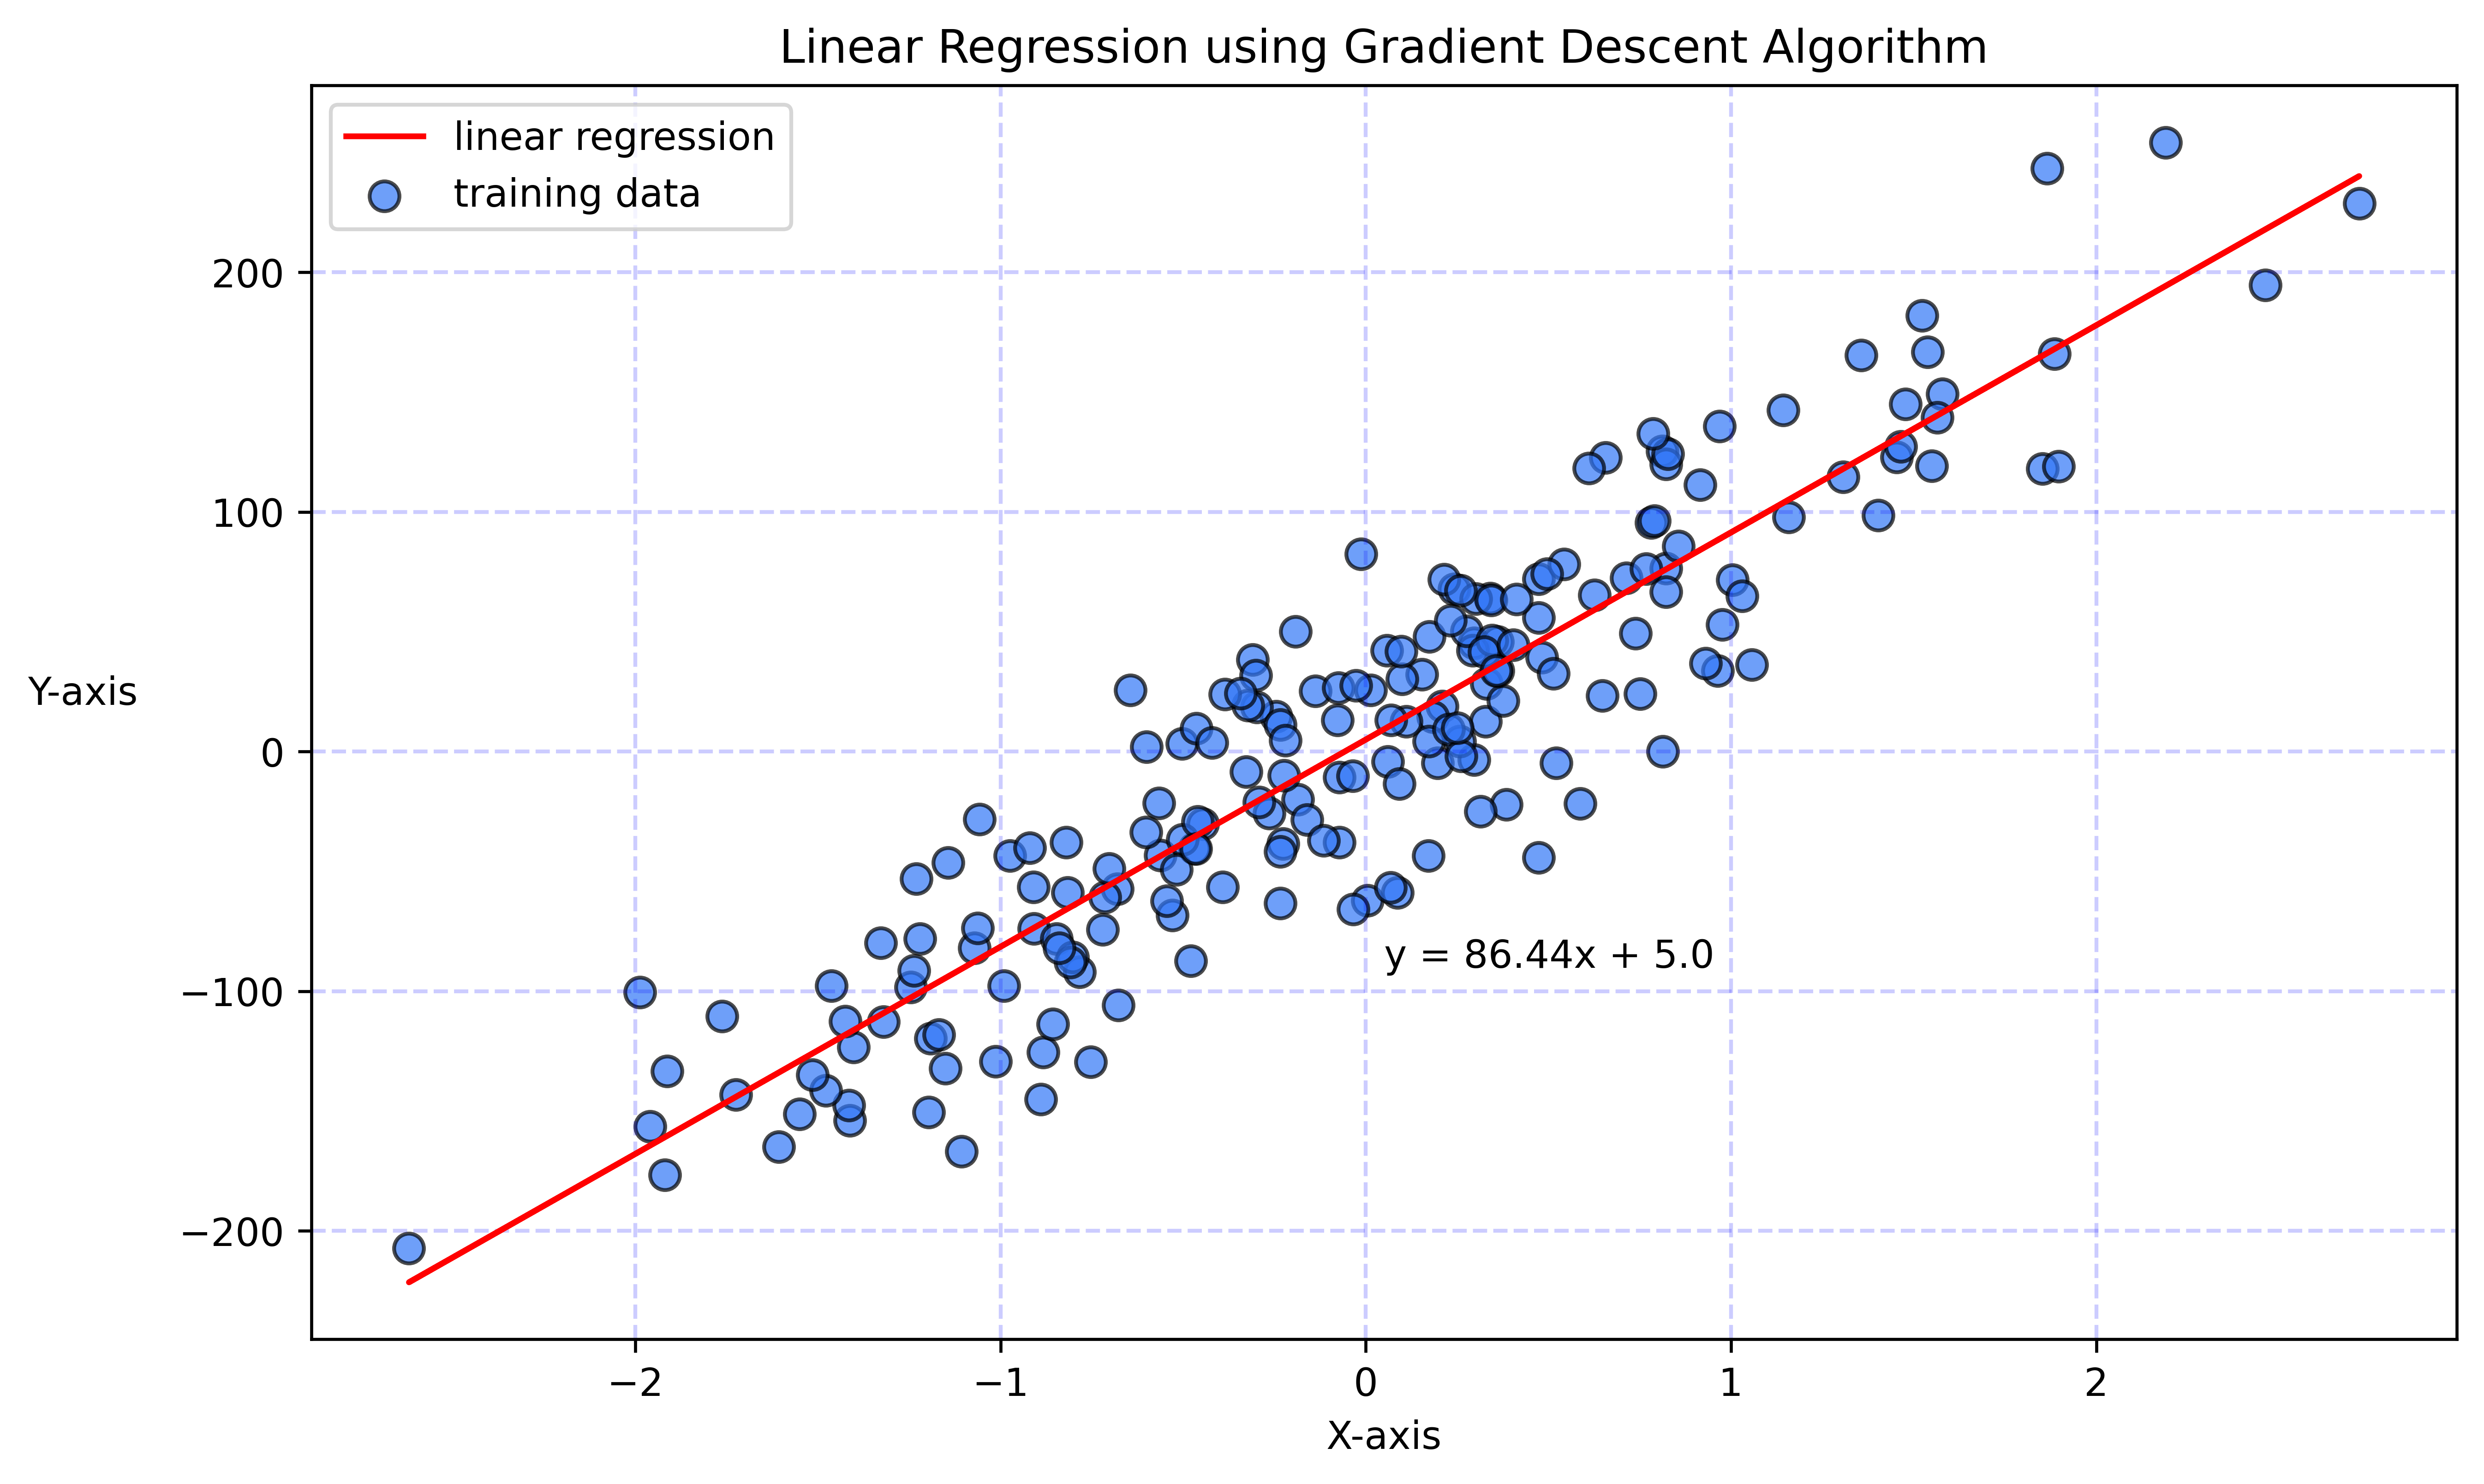

In [17]:
# Assign optimal values to the Hypothesis 
y_pred = m*x + b

# Plot Linear Regression graph
plt.figure(figsize=(10,6), dpi=600)
plt.title('Linear Regression using Gradient Descent Algorithm')
plt.xlabel("X-axis")
plt.ylabel("Y-axis", rotation=0, labelpad=25)
plt.text(0.05, -90, 'y = {}x + {}'.format(round(m,2), round(b,2)))
plt.scatter(x, y, color='#3176f7', label='training data', edgecolor='black', s=60, alpha=0.7)
plt.plot(x, y_pred, color='red', label='linear regression')
plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
plt.legend(loc='upper left')
plt.show()

# **Plotting the cost values of Gradient Descent Algorithm** 

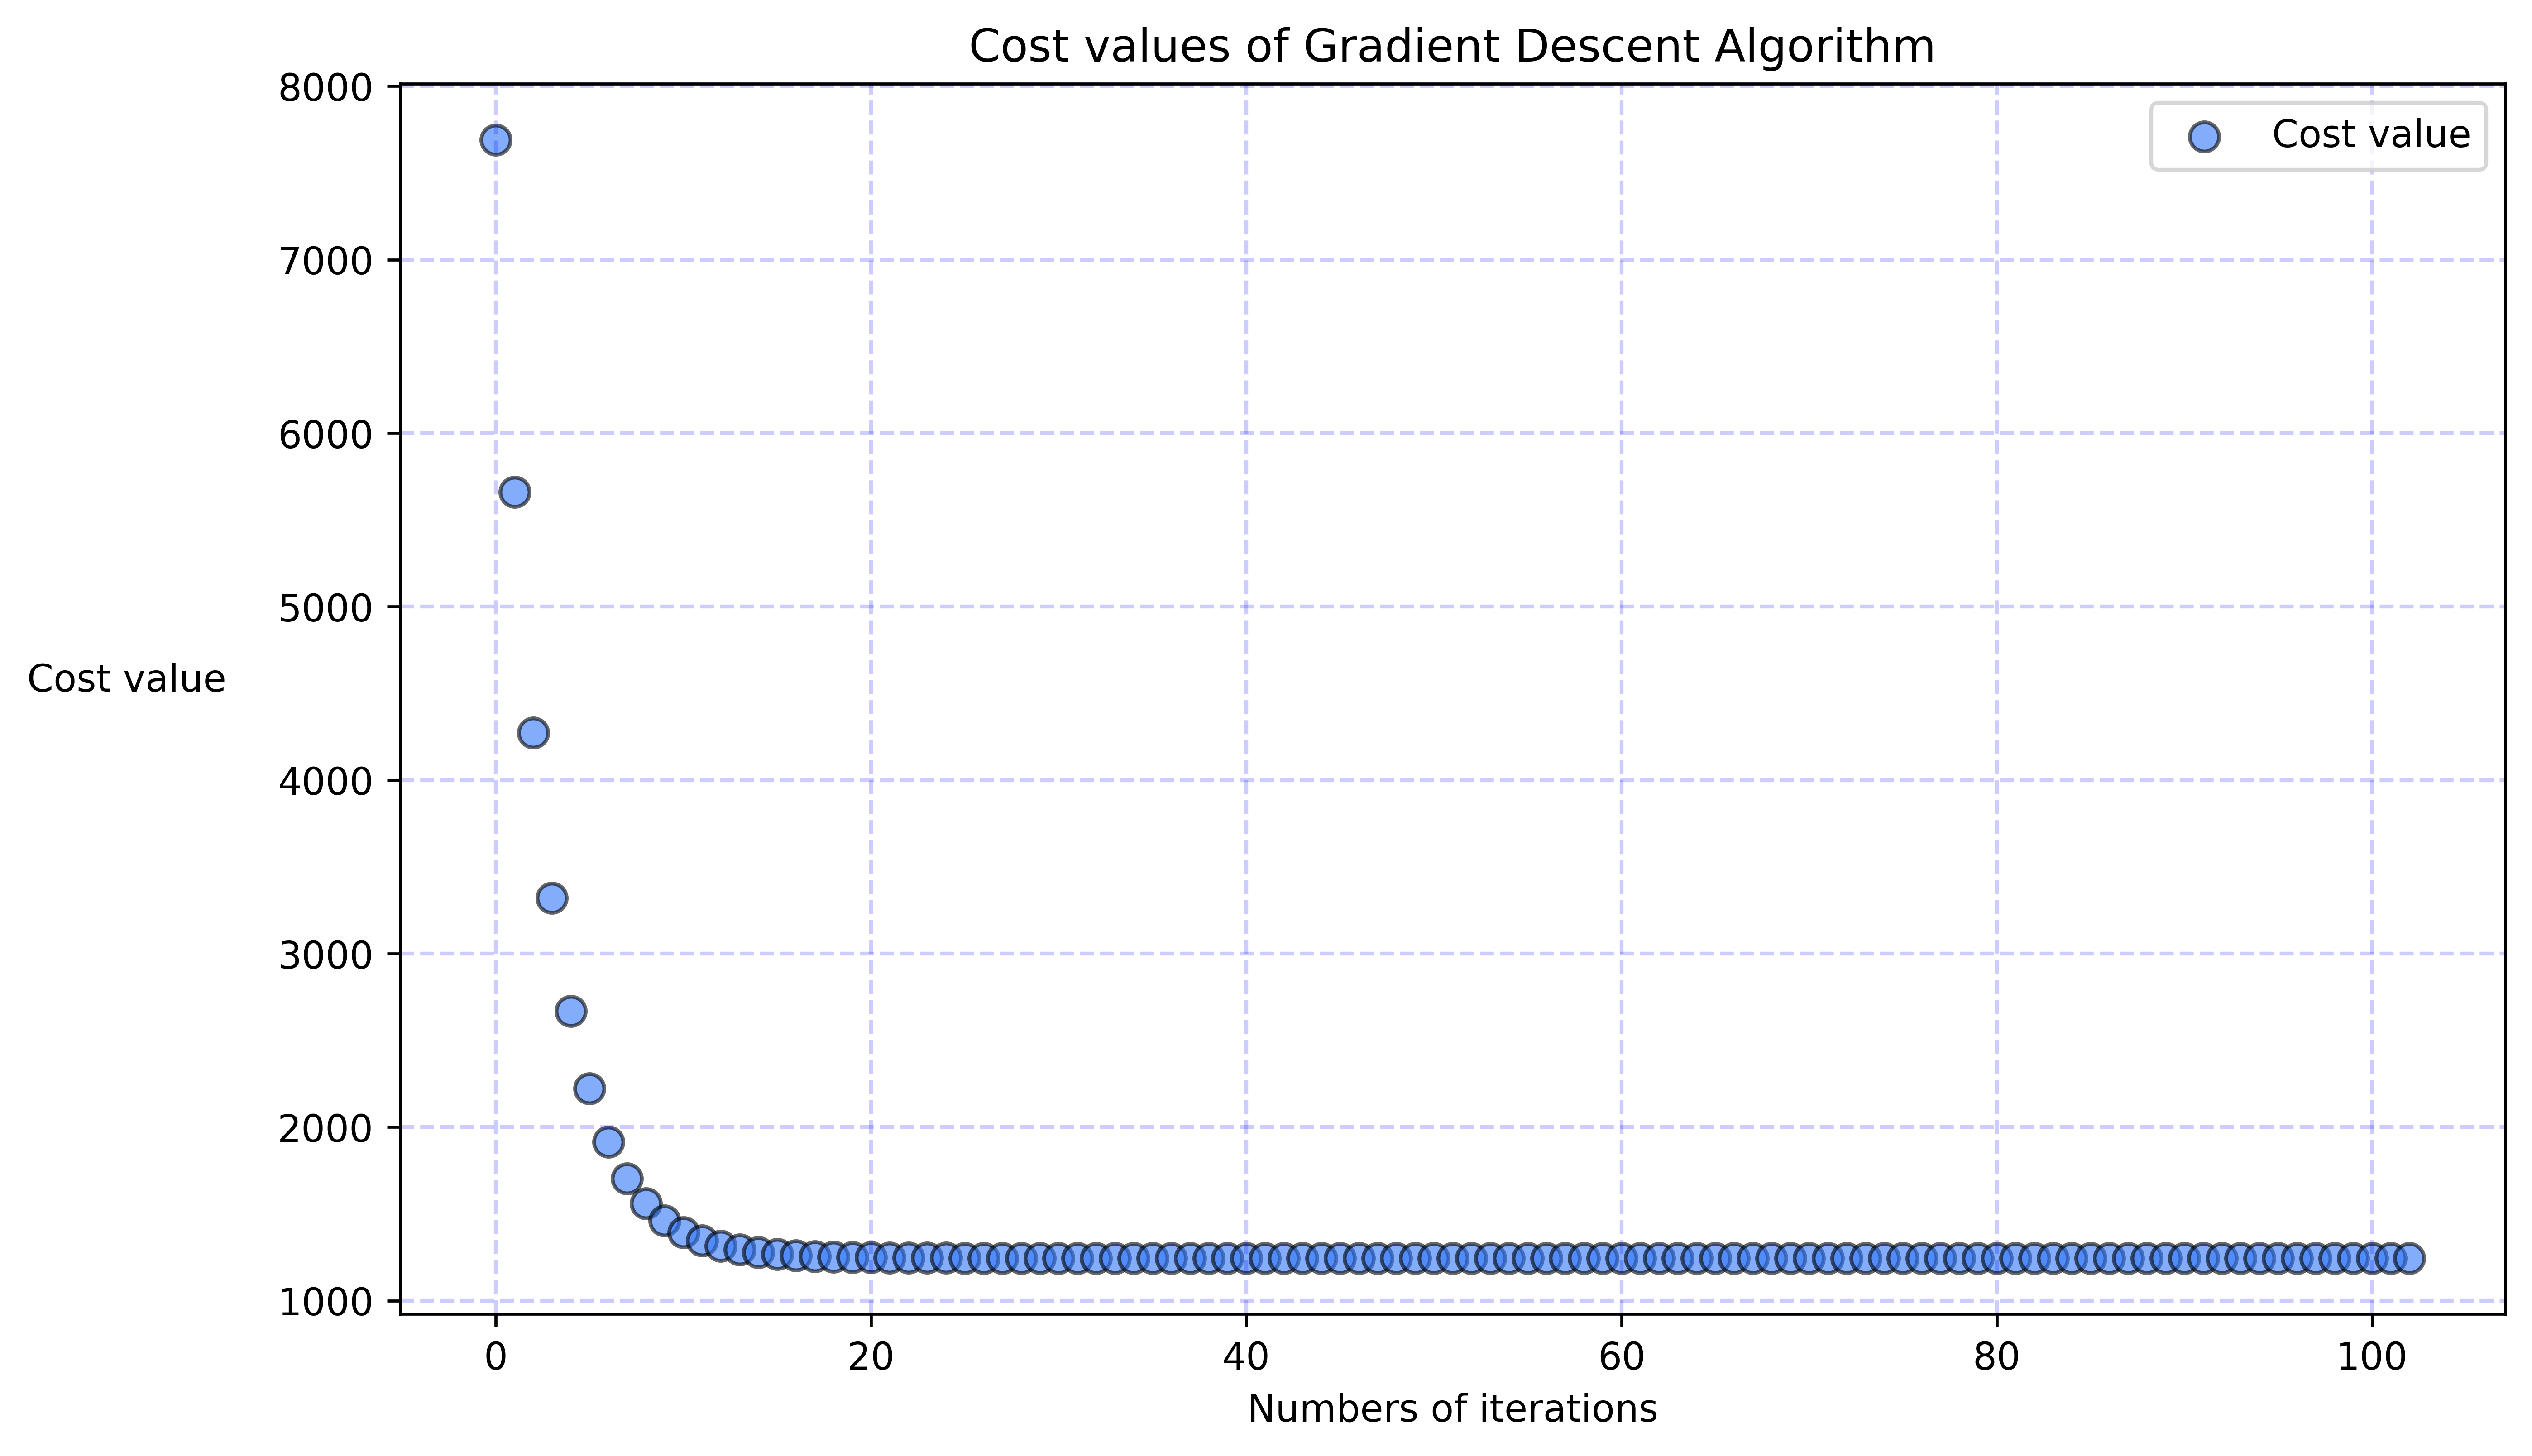

In [18]:
#Plot Cost Function graph
plt.figure(figsize=(10,6),dpi=600)
plt.title('Cost values of Gradient Descent Algorithm')
plt.xlabel("Numbers of iterations")
plt.ylabel("Cost value", rotation=0, labelpad=40)
plt.scatter(x=list(range(0,len(J))), y=J, color='#3176f7',label='Cost value', s=60, alpha=0.6, edgecolor='black')
plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
plt.legend(loc='upper right')
plt.show()
